# Trabajo: Eliminación de artefactos impulsivos en una imagen

**Nombre:** Kevin Fabricio Calle Urgilez

**Asignatura:** Percepción Computacional

**Fecha:** 23/05/18

Primero se importan las librerías necesarias que se usarán en este notebook:

In [1]:
# Se importan las librerías necesarias

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.signal import convolve2d
from skimage import io, img_as_float, filters, data

## 1. Crear una función que modele la adición, de forma aleatoria, de artefactos impulsivos. El resultado tendrá que apreciarse en la visualización de la imagen, que deberá estar afectada por ruido de tipo «sal y pimienta».

Se lee una imagen de la librería skimage. Se la convierte en punto flotante para que tome valores en rangos de 0 a 1. Se trabaja solo con un canal en escala de grises.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


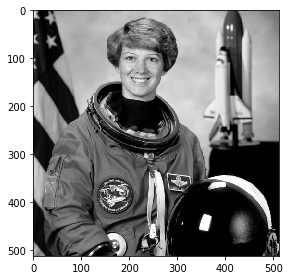

In [2]:
# Se carga la imagen y se la convierte a escala de grises

image = img_as_float(data.astronaut()[:, :, 1])
io.imshow(image)
io.show()

La siguiente función convierte una imagen limpia a una imagen con **ruido de tipo sal y pimienta**. Los parámetros que se ingresan en la función son la imagen y el número de pixeles que se quieren afectar por el ruido. La selección de los pixeles se realiza de forma aleatoria a lo largo de toda la imagen. 

El ruido de tipo sal y pimienta toman valores extremos (0 ó 1), por lo que a los pixeles seleccionados que tienden a ser blancos se los pinta de negro y a los pixeles que tienden a ser negros se los pinta de blanco.

In [3]:
# Se crea una función que genera el ruido sal y pimienta en pixeles aleatorios de la imagen. 

def salt_and_pepper_noise(img, num_pixels):
    #Esta función pide como parámetros la imagen y el número de pixeles que serán afectados por el ruido
    
    # Se crean dos vectores de tamaño num_pixels que contienen la posición de los pixeles que serán afectados
    aleatorios_fila = [random.randint(0, img.shape[0] - 1) for _ in range(num_pixels)]
    aleatorios_columna = [random.randint(0, img.shape[1] - 1) for _ in range(num_pixels)]

    # Este bucle "for" reemplaza los valores mayores a 0.5 por 0; y los menores a 0.5 por 1. Esto en las posiciones 
    # definidas anteriormente.
    for i in range(num_pixels):
        
        if ((img[aleatorios_fila[i], aleatorios_columna[i]]) > 0.5):
            img[aleatorios_fila[i], aleatorios_columna[i]] = 0
        else:
            img[aleatorios_fila[i], aleatorios_columna[i]] = 1
            
    imagen_con_sal_pimineta = img   
    
    return imagen_con_sal_pimineta

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


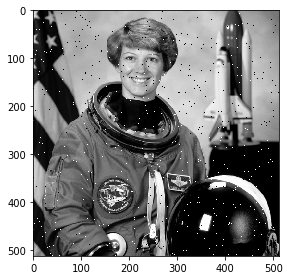

In [4]:
# Se genera una imagen con ruido sal y pimienta. En la función "salt_and_pepper_noise()" se ingresa como
# parámetros la imagen y el número de pixeles que serán afectados.
imagen_ruidosa = salt_and_pepper_noise(image, 2000)

io.imshow(imagen_ruidosa)
io.show()
image = img_as_float(data.astronaut()[:, :, 1])

## 3. A partir de la imagen ruidosa, buscaremos eliminar los artefactos impulsivos para el posterior tratamiento de la imagen. Para ello, se deberá aplicar un filtro adecuado para este tipo de ruido.

Para eliminar el ruido impulsivo se usa el **filtro de mediana**. Este filtro, a diferencia de la media que promedia todos los valores, tiene la característica de eliminar los extremos y quedarse con el valor mediano. Como el ruido sal y pimienta toma valores extremos este filtro es ideal para filtrar la imagen.

Los valores de la imagen se seleccionan por ventanas de nxn, donde n puede ser par o impar. En el caso de que n sea par se toma la media de los dos valores centrales. Pero cuando n es impar se elige el valor mediano.

A continuación se usa la función "pd.rolling_median" de la librería pandas. Los parámetros que se ingresan en la función son la imagen, el tamaño de la ventana (nxn) y el parámetro "center" que es la referencia de la posición en la ventana sobre la que se calcula la mediana. 

In [5]:
# Se introduce el tamaño de la ventana nxn 
window = 3

# Se filtra la imagen ruidosa de sal y pimienta con el filtro de mediana que elimina los valores extremos. 
imagen_filtrada = pd.rolling_median(imagen_ruidosa, window, center=True, how='median')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  """


C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


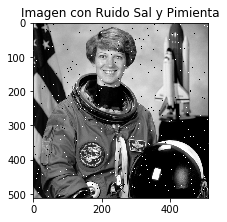

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


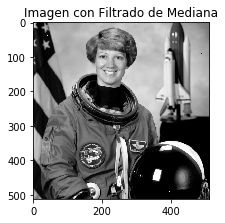

In [6]:
# Se crea una figura que contendrá a la imágen ruidosa de sal-pimienta y a la imágen filtrada con el filtro de la mediana.
plt.figure()

# Gráfico de la imagen con ruido sal-pimienta
plt.subplot(121)
plt.title('Imagen con Ruido Sal y Pimienta')
io.imshow(imagen_ruidosa)
io.show()

# Gráfico de la imagen filtrada con el filtro de mediana
plt.subplot(122)
plt.title('Imagen con Filtrado de Mediana')
io.imshow(imagen_filtrada)
io.show()

## 4. A partir de la imagen obtenida en la etapa anterior, se busca identificar las siluetas de las estructuras en ella presentes. A este fin, se debe identificar y razonar qué tipo de operador corresponde aplicar.

Para identificar los bordes de una imagen se debe aplicar un **filtro paso alto** que se quede con las partes de la imagen que presentan mayor variación en frecuencia. Estos picos se ubican en los contornos que tiene la imagen por la variabilidad en la intensidad de los pixeles.

El filtro se aplica mediante una ventana de 3x3 que recorre toda la imagen implementando un operador en cada pixel central. El operador que se utilizó en este filtrado es el **Operador de Sobel horizontal** el cual le da más peso a los píxeles cercanos al píxel de interés para el cálculo de las diferencias.

Para recorrer la imagen aplicando el filtro se usa una función vista en clase que convoluciona la ventana de nxn con la imagen. Esta función pide como parámetros la imagen, la ventana (Sobel 3x3 en este caso), el parámetro "mode" que es el tamaño de la salida y en este caso es igual a la imagen, el parámetro "boundary" indica como tratar los bordes en este caso se establece una condición simétrica o especular. 

In [7]:
# Se crea una función que convolucione la imagen con la ventana
def apply_mask(img, window):
    
    # Esta función pide como parámetro una imagen y una ventana nxn
    im_conv_d = convolve2d(img, window, mode="same", boundary="symm")
    return im_conv_d

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


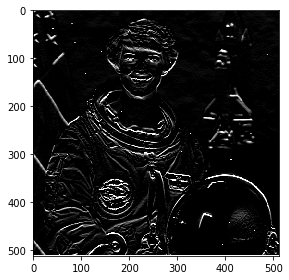

In [8]:
# Se establece la ventana que se utilizará para el filtrado de la imagen en la detección de bordes.

#Operador de Prewit vertical
#window = np.asarray([[-1,0,1],[-1,0,1],[-1,0,1]])

#Operador de Sobel vertical
#window = np.asarray([[-1,0,1],[-2,0,2],[-1,0,1]])

#Operador de Sobel horizontal
window = np.asarray([[1,2,1],[0,0,0],[-1,-2,-1]])

# Se aplica la función "apply_mask()" ingresando como parámetro la imagen y el operador de ventana
bordes_imagen = apply_mask(imagen_filtrada, window)

# Se realiza el gráfico de la imagen filtrada con la detección de bordes
io.imshow(bordes_imagen)
io.show()

A continuación se compara el filtrado anteriormente realizado con otro filtro llamado **Prewitt**. El filtro de Prewitt también tiene una ventana de 3x3, pero se diferencia en que distribuye un peso equitativo a los píxeles ubicados alado del píxel de interés.

Para aplicar el filtro de Prewitt se utiliza una función de la librería skimage "filters.prewitt()" que pide como parámetro la imagen a aplicar el filtrado.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


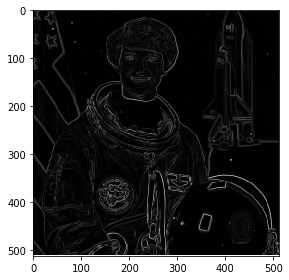

In [9]:
# Se utiliza el filtro de Prewitt paso alto para detectar los bordes de la imagen
imagen_prewitt = filters.prewitt(imagen_filtrada)

# se realiza el gráfico de la imagen
io.imshow(imagen_prewitt)
io.show()

## Referencias:

[1] Filtro de mediana. Online: https://pythoneyes.wordpress.com/2017/06/30/filtro-de-la-mediana-con-python-3-eliminacion-de-ruido-sal-y-pimienta-en-imagenes/

[2] Percepción Computacional. Apuntes UNIR Tema 8. 